In [109]:

# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as srn

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [111]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Clearly visible that there are no leakages and no object type column. So we don't have to preprocess anything. Going to EDA

scaling and average representation

In [113]:
ar1=[]
ar2=[]
ar3=[]
ar4=[]
ar5=[]
ar6=[]
colm=[]
for col in df.columns:
    if col != 'Outcome':
        colm.append(col)
        x1=df[df['Outcome']==0]
        x2=df[df['Outcome']==1]
        m1=max(df[col])
        m2=min(df[col])
        ar1.append((np.mean(x1[col])-m2)/(m1-m2))
        ar2.append((np.mean(x2[col])-m2)/(m1-m2))
        ar3.append((np.median(x1[col])-m2)/(m1-m2))
        ar4.append((np.median(x2[col])-m2)/(m1-m2))
        ar5.append((x1[col].mode()-m2)/(m1-m2))
        ar6.append((x2[col].mode()-m2)/(m1-m2))

The outcome 1 condition is always greater than the outcome 0 condition.

still the Glucose condition has a much higher value of outcome 1.

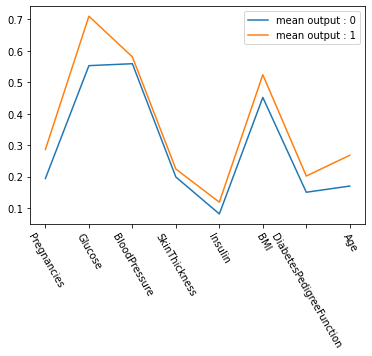

In [114]:
plt.plot(colm,ar1,label='mean output : 0')
plt.legend()
plt.plot(colm,ar2,label='mean output : 1')
plt.legend()
plt.xticks(rotation=300)
plt.show()

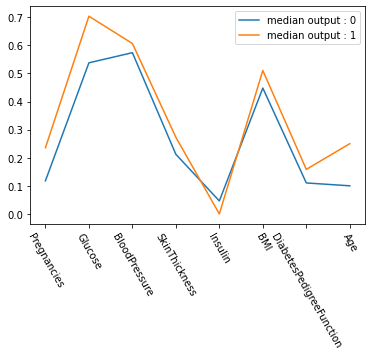

In [115]:

plt.plot(colm,ar3,label='median output : 0')
plt.legend()
plt.plot(colm,ar4,label='median output : 1')
plt.legend()
plt.xticks(rotation=300)
plt.show()

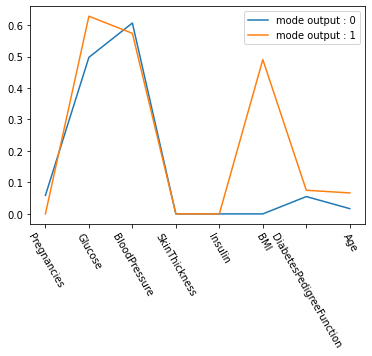

In [116]:

plt.plot(colm,ar5,label='mode output : 0')
plt.legend()
plt.plot(colm,ar6,label='mode output : 1')
plt.legend()

plt.xticks(rotation=300)
plt.show()

In [117]:
df.duplicated().value_counts()

False    768
dtype: int64

There are no duplicates in the data . So it is clear to go forward.

In [118]:
model=RandomForestRegressor()

Creating X and Y

In [119]:
X=df.drop('Outcome',1)
y=df['Outcome']

train-test split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [121]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.30404142307692306

In [122]:
model=RandomForestClassifier()

In [123]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.7597402597402597

In [124]:
model=KNeighborsClassifier(n_neighbors=2)

In [125]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.6948051948051948

In [126]:
model=svm.SVC()

In [127]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.7857142857142857

In [128]:
model=GaussianNB()

In [129]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.7402597402597403

after checking through various classifiers the SVM gave us the best prediction.

### UPVOTE if you like the kernel :)